#Analisando sentimento de produto
Usando scikit-learn, sframe (opensource), matplotlib e seaborn

In [1]:
import sframe as sf
import sklearn
import numpy as np

##Importando a base

In [2]:
products = sf.SFrame('amazon_baby.gl/')

2016-04-03 14:37:35,640 [INFO] sframe.cython.cy_server, 172: SFrame v1.8.5 started. Logging C:\Users\PIETER~1.VOL\AppData\Local\Temp\sframe_server_1459705055.log.0


In [3]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


##Contando palavras

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vect = CountVectorizer()
features = vect.fit_transform(products['review'])

In [6]:
print type(features)

<class 'scipy.sparse.csr.csr_matrix'>


In [7]:
features.shape

(183531, 68032)

In [8]:
vect.get_feature_names()[0:20]

[u'00',
 u'000',
 u'0001',
 u'000ft',
 u'000importer',
 u'000sqft',
 u'001',
 u'001cm',
 u'00am',
 u'00amcreepy',
 u'00cons',
 u'00dollars',
 u'00etwhile',
 u'00not',
 u'00pm',
 u'01',
 u'01262',
 u'016sc01',
 u'01992',
 u'01p']

In [9]:
vect.get_params()

{'analyzer': u'word',
 'binary': False,
 'decode_error': u'strict',
 'dtype': numpy.int64,
 'encoding': u'utf-8',
 'input': u'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': u'(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [10]:
vect.vocabulary_.get('love')

35916

##Olhando informações de um produto específico

In [11]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [12]:
len(giraffe_reviews)

785

:0: FutureWarning: IPython widgets are experimental and may change in the future.


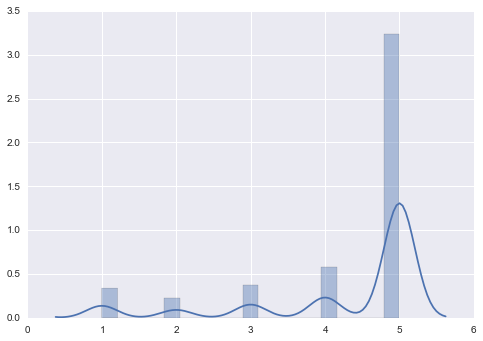

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(giraffe_reviews['rating'])

(array([  56.,   37.,   62.,   95.,  535.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

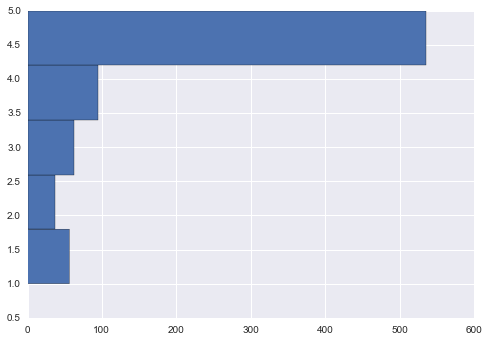

In [14]:
plt.hist(giraffe_reviews['rating'], orientation='horizontal', bins=5)

##Construindo o classificador de sentimento

(array([  15183.,   11310.,   16779.,   33205.,  107054.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

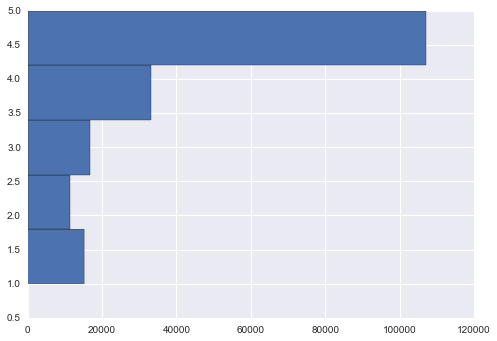

In [15]:
plt.hist(products['rating'], orientation='horizontal', bins=5)

In [16]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [17]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >= 4

In [18]:
products.head()

name,review,rating,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,1


##Treinando o modelo

In [19]:
print float(len(products[products['sentiment']==1])) / float(len(products))

0.841123344847


In [20]:
train_data, test_data = products.random_split(.8, seed=0)

In [21]:
# instantiate the vectorizer
vect = CountVectorizer()

In [22]:
# treinando o vocabulário, e então cria no modelo document-term matrix
train_review_dtm = vect.fit_transform(train_data['review'])
train_review_dtm

<133448x57374 sparse matrix of type '<type 'numpy.int64'>'
	with 7078177 stored elements in Compressed Sparse Row format>

In [23]:
# transformando dados de teste usando o vocabulário criado no mesmo modelo
test_review_dtm = vect.transform(test_data['review'])
test_review_dtm

<33304x57374 sparse matrix of type '<type 'numpy.int64'>'
	with 1751823 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.linear_model import LogisticRegression
sentiment_model = LogisticRegression()
sentiment_model.fit(train_review_dtm, train_data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

##Avaliando o modelo

In [25]:
coefficients = sf.SFrame()
coefficients['word'] = vect.get_feature_names()
coefficients['coefficient'] = sentiment_model.coef_[0]
coefficients

word,coefficient
00,-0.648011177351
000,-0.0643371561678
0001,0.00293408775754
000ft,0.00122487713051
001,-0.215588506891
001cm,1.57240939364e-06
00am,0.330402125994
00amcreepy,-0.408805273615
00cons,-1.28954675813e-06
00dollars,-0.190916004795


In [26]:
# class predictions and predicted probabilities
sentiment_pred_class = sentiment_model.predict(test_review_dtm)
sentiment_pred_prob = sentiment_model.predict_proba(test_review_dtm)[:, 1]

In [27]:
sentiment_pred_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
sentiment_pred_prob

array([ 0.99279602,  0.92074699,  0.89435388, ...,  0.5952605 ,
        0.99733618,  0.99905273])

In [29]:
from sklearn import metrics
print metrics.accuracy_score(np.array(test_data['sentiment']), sentiment_pred_class)
print metrics.roc_auc_score(np.array(test_data['sentiment']), sentiment_pred_prob)

0.932140283449
0.955522080246


In [30]:
cm = metrics.confusion_matrix(np.array(test_data['sentiment']), sentiment_pred_class)

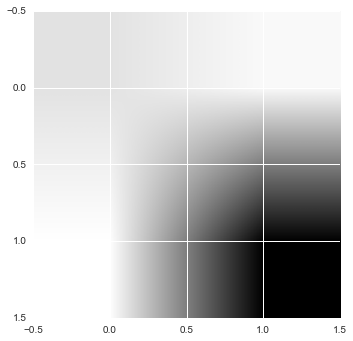

In [32]:
plt.imshow(cm, cmap='binary')

In [33]:
print cm

[[ 3883  1445]
 [  815 27161]]


##Aplicando modelo em um produto específico

In [34]:
giraffe_dtm = vect.transform(giraffe_reviews['review'])
giraffe_dtm

<785x57374 sparse matrix of type '<type 'numpy.int64'>'
	with 36612 stored elements in Compressed Sparse Row format>

In [35]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_dtm)

In [36]:
giraffe_reviews['predicted_probability'] = sentiment_model.predict_proba(giraffe_dtm)[:, 1]

In [37]:
giraffe_reviews.head()

name,review,rating,predicted_sentiment,predicted_probability
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,1,0.99853842803
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,1,0.999250582822
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,1,0.521997632304
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,1,0.958207199224
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,1,0.581813893964
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,1,0.99998691577
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,1,0.994262678314
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,1,0.993254992045
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,0,0.499375206929
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,0,0.44114917097


In [38]:
giraffe_reviews = giraffe_reviews.sort('predicted_probability', ascending=False)

In [39]:
giraffe_reviews.head()

name,review,rating,predicted_sentiment,predicted_probability
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,1,1.0
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,1,0.99999999998
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,1,0.999999999358
Vulli Sophie the GiraffeTeether ...,"Yes, it's imported. Yes,it's expensive. And yes, ...",5.0,1,0.999999998143
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,1,0.99999999424
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,1,0.999999986735
Vulli Sophie the GiraffeTeether ...,"Being a childphotographer, I saw lots ...",4.0,1,0.999999976075
Vulli Sophie the GiraffeTeether ...,My 8 week old LOVESSophie. The rubber feels ...,5.0,1,0.999999971813
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,1,0.999999967358
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,1,0.99999991296


In [40]:
giraffe_reviews.tail()

name,review,rating,predicted_sentiment,predicted_probability
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,0,0.000751374675766
Vulli Sophie the GiraffeTeether ...,Totally overpriced forwhat it is. Go to ...,1.0,0,0.000707779148468
Vulli Sophie the GiraffeTeether ...,I got one of these as ashowe gift that my baby ...,1.0,0,0.000479634613256
Vulli Sophie the GiraffeTeether ...,"Alright, first off didn'trealize this was a ...",2.0,0,0.000413535102543
Vulli Sophie the GiraffeTeether ...,When I received this thepaint was peeling off in ...,1.0,0,0.000205648312211
Vulli Sophie the GiraffeTeether ...,I was so looking forwardto getting this for my ...,1.0,0,0.000172825395215
Vulli Sophie the GiraffeTeether ...,Received the product andsmells like cheap rub ...,1.0,0,0.000115959107431
Vulli Sophie the GiraffeTeether ...,For about a month (month6) this was his favorite ...,3.0,0,5.33220963061e-05
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,0,4.67562395069e-05
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,0,2.63276843645e-09


#Atividades
##Exercício 1

In [41]:
selected_words = ['awesome', 
                  'great', 
                  'fantastic', 
                  'amazing', 
                  'love', 
                  'horrible', 
                  'bad', 
                  'terrible', 
                  'awful', 
                  'wow', 
                  'hate']

In [42]:
for word in selected_words :
    products[word] = products['review'].apply(lambda r: r.lower().split().count(word))

In [43]:
products.head()

name,review,rating,sentiment,awesome,great,fantastic,amazing
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,1,0,0,0,0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,1,0,0,0,0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,1,0,0,0,0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1,0,1,0,0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,1,0,1,0,0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,1,0,0,0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,1,0,0,0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,1,0,0,0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,1,0,0,0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,1,0,0,0,0


In [44]:
for word in selected_words :
    print word + ': %s' % (sum(products[word])) 

awesome: 2002
great: 42420
fantastic: 873
amazing: 1305
love: 40277
horrible: 659
bad: 3197
terrible: 673
awful: 345
wow: 131
hate: 1057


##Exercício 2

In [45]:
train_data, test_data = products.random_split(.8, seed=0)

In [46]:
selected_words_model = LogisticRegression()
selected_words_model.fit((train_data[selected_words]).to_dataframe(), train_data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [47]:
coefficients = sf.SFrame()

In [48]:
coefficients['selected_word'] = selected_words

In [49]:
coefficients['coefficient'] = selected_words_model.coef_.tolist()[0]

In [50]:
coefficients

selected_word,coefficient
awesome,1.04528583205
great,0.883406480045
fantastic,0.871025782877
amazing,0.878523297036
love,1.39844497088
horrible,-1.9776035555
bad,-0.984004354466
terrible,-2.07097397554
awful,-1.73316332165
wow,-0.0494222817817


In [51]:
coefficients = coefficients.sort('coefficient', ascending=False)

In [52]:
print coefficients[0]
print coefficients[-1]

{'coefficient': 1.3984449708808617, 'selected_word': 'love'}
{'coefficient': -2.070973975539287, 'selected_word': 'terrible'}


##Exercício 3

In [53]:
selected_words_pred_class = selected_words_model.predict((test_data[selected_words]).to_dataframe())
selected_words_pred_prob = selected_words_model.predict_proba((test_data[selected_words]).to_dataframe())[:, 1]

In [54]:
print 'accuracy model 1: %s' % metrics.accuracy_score(np.array(test_data['sentiment']), sentiment_pred_class)
print 'roc auc model 1: %s' % metrics.roc_auc_score(np.array(test_data['sentiment']), sentiment_pred_prob)

print 'accuracy model 2: %s' % metrics.accuracy_score(np.array(test_data['sentiment']), selected_words_pred_class)
print 'roc auc model 2: %s' % metrics.roc_auc_score(np.array(test_data['sentiment']), selected_words_pred_prob)

accuracy model 1: 0.932140283449
roc auc model 1: 0.955522080246
accuracy model 2: 0.843111938506
roc auc model 2: 0.664869001562


##Exercício 4

In [55]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [56]:
len(diaper_champ_reviews)

298

(array([  30.,   20.,    0.,   59.,  189.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

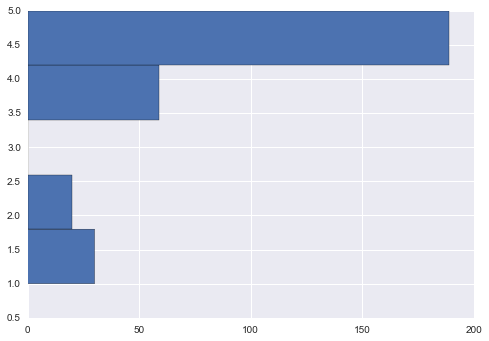

In [57]:
plt.hist(diaper_champ_reviews['rating'], orientation='horizontal', bins=5)

In [58]:
diaper_dtm = vect.transform(diaper_champ_reviews['review'])
diaper_champ_reviews['predicted_probability'] = sentiment_model.predict_proba(diaper_dtm)[:, 1]

In [59]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_probability', ascending=False)

In [60]:
diaper_champ_reviews.head()

name,review,rating,sentiment,awesome,great,fantastic,amazing
Baby Trend Diaper Champ,"This is absolutely, byfar, the best diaper ...",5.0,1,0,0,0,0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,1,0,0,0,0
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,1,0,0,0,0
Baby Trend Diaper Champ,I love my Diaper Champ.My son is 3 months old ...,4.0,1,0,1,0,0
Baby Trend Diaper Champ,I can't say enough goodthings about the Champ. ...,5.0,1,0,0,0,0
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,1,0,0,0,0
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,1,0,0,0,0
Baby Trend Diaper Champ,"At only 3 weeks old, myson goes through about a ...",5.0,1,0,1,0,0
Baby Trend Diaper Champ,I received the DiaperChamp at my baby shower ...,5.0,1,0,1,0,0
Baby Trend Diaper Champ,I've worked with kidsmore than half my life. ...,5.0,1,0,0,0,0


Para efeito de comparação com o exercício com graphlab, o item a ser avaliado é o 3º da lista. A probabilidade, por algum motivo não foi a mais alta.

In [61]:
diaper_champ_reviews[2]['predicted_probability']

0.9999997934850402

In [62]:
print selected_words_model.predict_proba((diaper_champ_reviews[2:3][selected_words]).to_dataframe())[:, 1]

[ 0.79690374]


In [63]:
print diaper_champ_reviews[['review']][2]
diaper_champ_reviews[selected_words].head(3)

{'review': 'Baby Luke can turn a clean diaper to a dirty diaper in 3 seconds flat. The diaper champ turns the smelly diaper into "what diaper smell" in less time than that. I hesitated and wondered what I REALLY needed for the nursery. This is one of the best purchases we made. The champ, the baby bjorn, fluerville diaper bag, and graco pack and play bassinet all vie for the best baby purchase.Great product, easy to use, economical, effective, absolutly fabulous.UpdateI knew that I loved the champ, and useing the diaper genie at a friend\'s house REALLY reinforced that!! There is no comparison, the chanp is easy and smell free, the genie was difficult to use one handed (which is absolutly vital if you have a little one on a changing pad) and there was a deffinite odor eminating from the genieplus we found that the quick tie garbage bags where the ties are integrated into the bag work really well because there isn\'t any added bulk around the sealing edge of the champ.'}


awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
0,0,0,0,2,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
